# Visualizing an HI tail of an NGC 7541 dwarf satellite

This simple notebook using Ipyvolume to visualize the HI emission of LS-359104-13 ([Legacy Survey Viewer link](https://www.legacysurvey.org/viewer?ra=348.6965&dec=4.6396&layer=ls-dr9&zoom=15)), a satellite dwarf galaxy of NGC 7541. As seen in Figure 5 of the paper, there clearly appears to be a ram pressure tail extending toward the south from the satellite toward the massive galaxy pair. Additionally, there is a cloud of HI gas located further south which we posit is a southern extension of the tail from the dwarf. 

Below, we show the HI data cube associated with the dwarf satellite, its tail and extension, along with the massive galaxy pair. Along the x- (left or right in the plane of the screen) and y-axes (up or down in the plane of the screen) are the RA and Dec. The z-axis (into or out of the screen) shows the velocity. The units of the datacube are in native pixel and spectral units. See Section 2 of the paper for more information on the data reduction and masking of the sources using SoFiA.

Viewed side-on (Dec vs. Velo), the dwarf and the cloud are seemingly connected by a "C"-shaped trail of HI that pass "through" the massive galaxy pair. This 3D visualization provides more convincing envidence for the ram pressure stripping scenario of LS-359104-13 than the 2D contours alone.


In [ ]:
import ipyvolume as ipv
from astropy.io import fits

In [ ]:
data = fits.getdata('NGC7541.tailsubcube.robust2.masked.fits')

#### Quick notes on visualization with ipyvolume


The data cube will start at a face-on orientation with the lowest systemic velocity channel (~2400 km/s, channel ~ 104) and the highest systemic velocity channel (~2900 km/s, channel 1) at the "back" (i.e. further into the screen) of the figure.

The HI emission is separated into three volumetric contours based on their intensities: red - lowest, green - intermediate, and blue - highest. The preset levels were chosen to highlight the connected nature of the dwarf satellite tail and the southern extension. Users are free to comment out the first <tt>volshow<tt> call and uncomment the second one. They can then change the <tt>level_width<tt>, re-run the cell, and adjust the levels/opacities manually using the sliders.

In [ ]:
fig = ipv.figure()
vol = ipv.volshow(data, level=[0.085, 0.2, 0.6], opacity=[0.08, 0.05, 0.1],level_width=0.01,description='NGC7541 Field')
### Adjust the level_width, comment out the line above, and re-run
#vol = ipv.volshow(data,level_width=0.01,description='NGC7541 Field')

ipv.xlabel("RA")
ipv.ylabel("Dec")
ipv.zlabel("Velo")
ipv.show()

### An alternative visulization using moment 0 maps

Here we use the Moment-0 (i.e. intensity maps) along the "face-on" and "side-on" POV for the NGC7541 system.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from spectral_cube import SpectralCube
from astropy.visualization import simple_norm
from astropy.wcs import WCS

In [ ]:
cube = SpectralCube.read('./NGC7541.tailsubcube.robust2.masked.fits')

In [ ]:
dec_vel = cube.moment(order=0,axis=2)
ra_dec = cube.moment(order=0,axis=0)
ra_vel = cube.moment(order=0,axis=1)


/Users/ananthan/anaconda3/envs/astro_3d/lib/python3.10/site-packages/spectral_cube/wcs_utils.py:156: WCSWarning: Slicing across a celestial axis results in an invalid WCS, so the celestial projection (SIN) is being removed.  The WCS indices being kept were [1 2].
  warnings.warn("Slicing across a celestial axis results "
/Users/ananthan/anaconda3/envs/astro_3d/lib/python3.10/site-packages/spectral_cube/wcs_utils.py:156: WCSWarning: Slicing across a celestial axis results in an invalid WCS, so the celestial projection (SIN) is being removed.  The WCS indices being kept were [0 2].
  warnings.warn("Slicing across a celestial axis results "


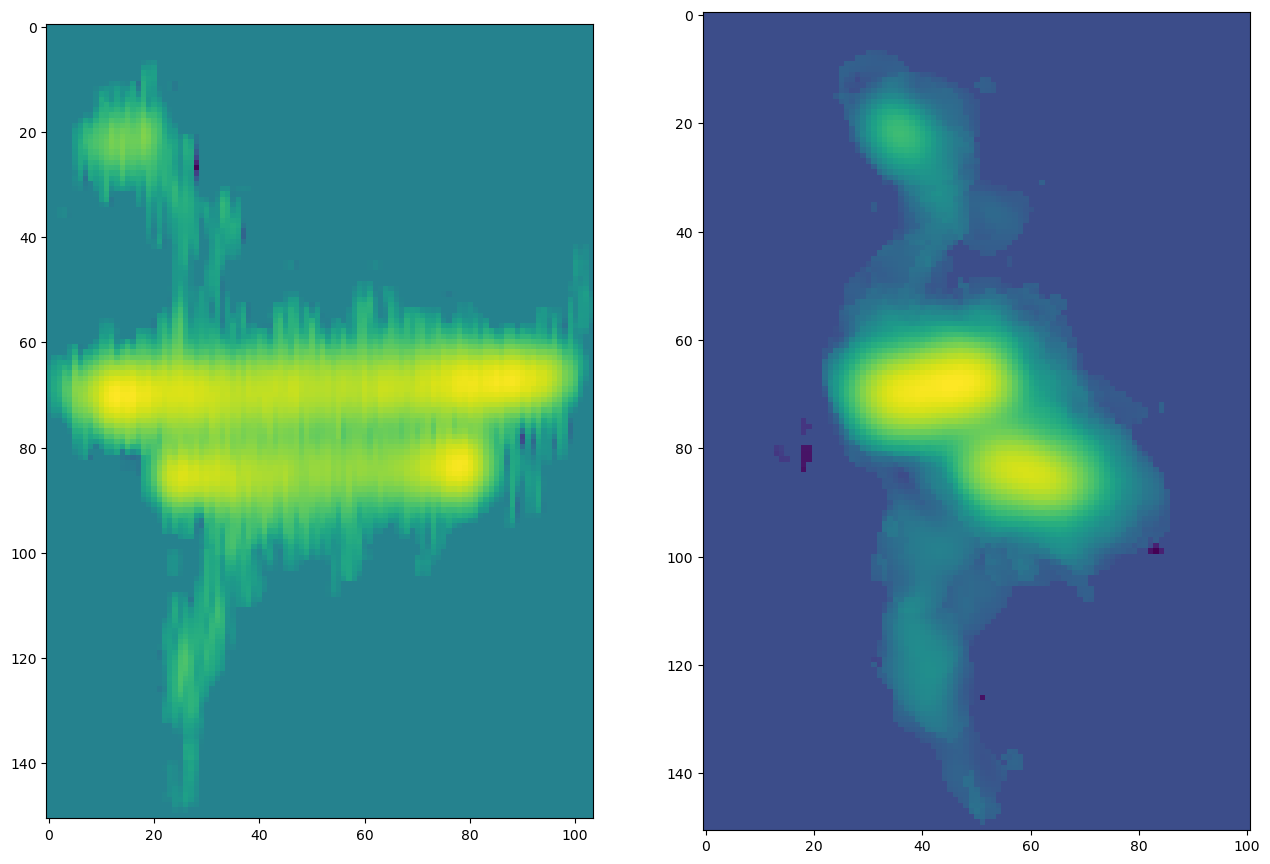

In [ ]:
norm_dv = simple_norm(dec_vel.data,'log')
norm_rd = simple_norm(ra_dec.data,'log')

plt.figure(figsize=(24,24))
ax1 = plt.subplot(131)
ax1.imshow(dec_vel.value.T[::-1],norm=norm_dv)
ax2 = plt.subplot(132)
ax2.imshow(ra_dec.data[::-1],norm=norm_rd)
